This example demonstrates how to simulate steady channel flow in **20 lines of code!** We recommend using a Python notebook (`.ipynb`) for an interactive experience.

### 1. Define the Geometry and Physics

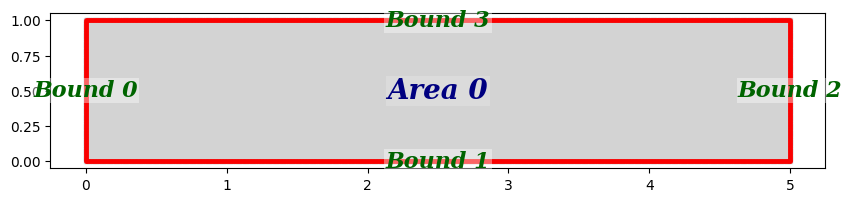

In [1]:
import deepflow as df
df.manual_seed(69)

# Create a 5x1 rectangle
rectangle = df.geometry.rectangle([0, 5], [0, 1])
domain = df.domain(rectangle)
domain.show_setup()

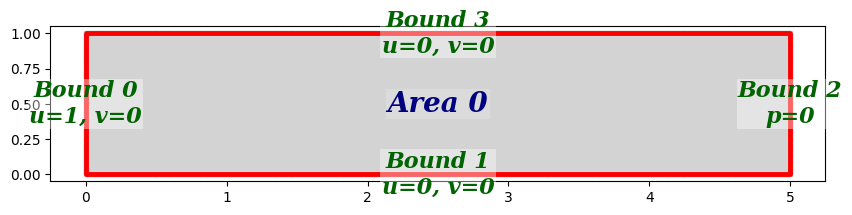

In [2]:
# Define Boundary Conditions
domain.bound_list[0].define_bc({'u': 1, 'v': 0})   # Inflow: u=1
domain.bound_list[1].define_bc({'u': 0, 'v': 0})  # Wall: No slip
domain.bound_list[2].define_bc({'p': 0})          # Outflow: p=0
domain.bound_list[3].define_bc({'u': 0, 'v': 0})  # Wall: No slip

# Define PDE (Navier-Stokes)
domain.area_list[0].define_pde(df.pde.NavierStokes(U=0.0001, L=1, mu=0.001, rho=1000))
domain.show_setup()

### 2. Generate Training Data

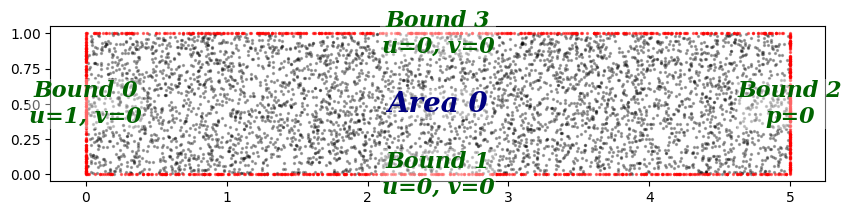

In [3]:
# Sample points: [Left, Bottom, Right, Top], [Interior]
domain.sampling_random([200, 400, 200, 400], [5000])
domain.show_coordinates(display_conditions=True)

### 3. Create and Train the Model

In [4]:
model0 = df.PINN(width=32, length=4)
model1, model1_best = model0.train_adam(
    calc_loss = df.calc_loss_simple(domain),
    learning_rate=0.004,
    epochs=2000
)

Epoch: 1, total_loss: 0.98882, bc_loss: 0.98858, pde_loss: 0.00024
Epoch: 200, total_loss: 0.09944, bc_loss: 0.07822, pde_loss: 0.02122
Epoch: 400, total_loss: 0.05281, bc_loss: 0.03665, pde_loss: 0.01616
Epoch: 600, total_loss: 0.06140, bc_loss: 0.05148, pde_loss: 0.00993
Epoch: 800, total_loss: 0.01930, bc_loss: 0.01578, pde_loss: 0.00352
Epoch: 1000, total_loss: 0.02775, bc_loss: 0.02239, pde_loss: 0.00536
Epoch: 1200, total_loss: 0.01272, bc_loss: 0.01083, pde_loss: 0.00189
Epoch: 1400, total_loss: 0.01153, bc_loss: 0.00939, pde_loss: 0.00214
Epoch: 1600, total_loss: 0.01225, bc_loss: 0.01028, pde_loss: 0.00197
Epoch: 1800, total_loss: 0.00819, bc_loss: 0.00693, pde_loss: 0.00126
Epoch: 2000, total_loss: 0.00660, bc_loss: 0.00547, pde_loss: 0.00114


### 4. Visualize Results

Available data keys: ('u', 'v', 'p', 'PDE residual', 'x', 'y', 'u_x', 'u_y', 'v_x', 'v_y', 'p_x', 'p_y', 'continuity_residual', 'x_momentum_residual', 'y_momentum_residual', 'total_loss', 'bc_loss', 'pde_loss')


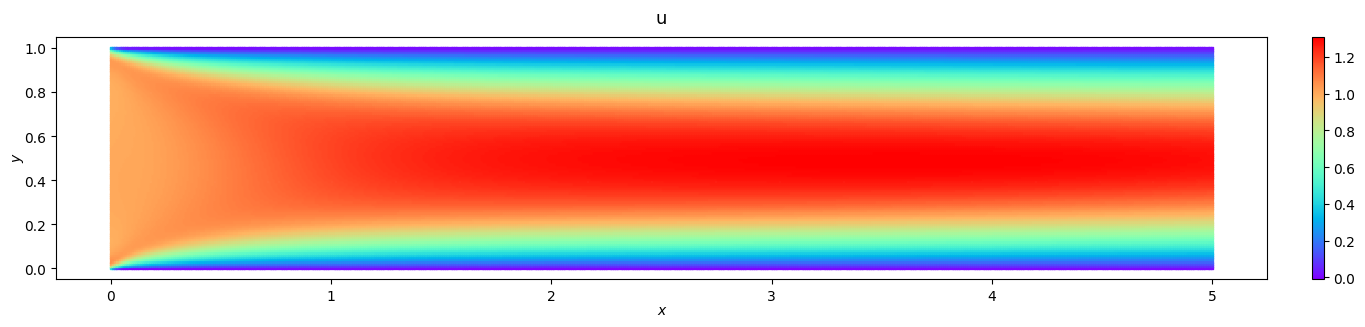

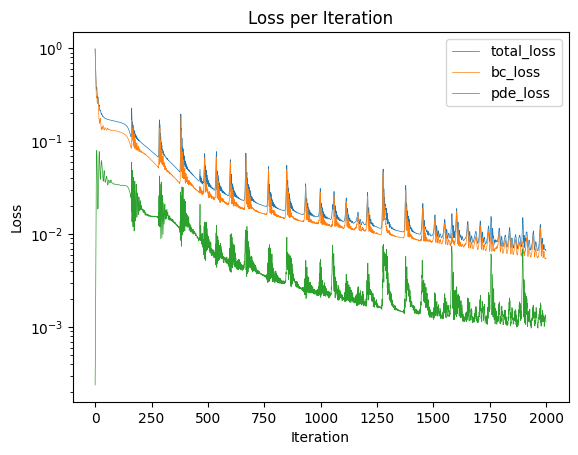

In [5]:
# Evaluate the best model
prediction = domain.area_list[0].evaluate(model1_best)
prediction.sampling_area([500, 100])

# Plot Velocity Field
_ = prediction.plot_color({'u': 'rainbow'})

# Plot Training Loss
_ =prediction.plot_loss_curve(log_scale=True)